In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
v_range = np.linspace(4,300,1000)
def y(x,a,b):
    return a*np.e**(b*np.log(x))

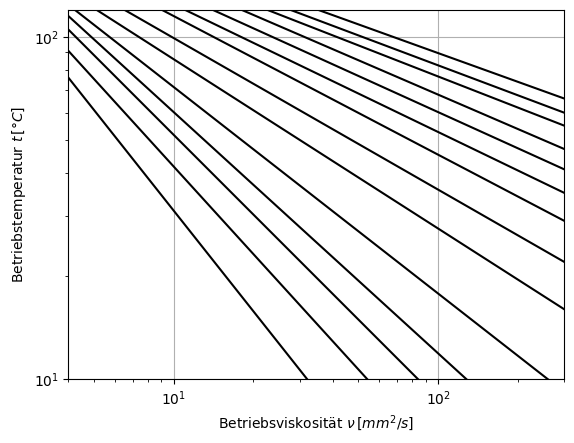

In [4]:
fig,ax = plt.subplots()
stil = "-k"

p10 = [4,32,76,10]
p15 = [4,54,91,10]
p22 = [4,84,105,10]
p32 = [4,128,115,10]
p46 = [4,260,124,10]
p68 = [5.1,300,120,16]
p100 = [6.5,300,120,22]
p150 = [9,300,120,29]
p220 = [11,300,120,35]
p320 = [14,300,120,41]
p460 = [18,300,120,47]
p680 = [22.5,300,120,55]
p1000 = [27.5,300,120,60]
p1500 = [35,300,120,66]

ps = [p10,p15,p22,p32,p46,p68,p100,p150,p220,p320,p460,p680,p1000,p1500]

for p in ps:
    ax.plot([p[0],p[1]],[p[2],p[3]],stil)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(4,300)
ax.set_ylim(10,120)
ax.set_xlabel("Betriebsviskosität $\\nu\,[mm^2/s]$")
ax.set_ylabel("Betriebstemperatur $t\,[°C]$")
ax.grid()

In [5]:
x,y,a,b,x1,y1,x2,y2 = sp.symbols("\\nu \\vartheta a b \\nu_1 \\vartheta_1 \\nu_2 \\vartheta_2")

In [18]:
gl = sp.Eq(b * sp.log(x,10) + sp.log(a,10),sp.log(y,10))
gl

Eq(b*log(\nu)/log(10) + log(a)/log(10), log(\vartheta)/log(10))

In [7]:
x_gl = sp.solve(gl,x)[0]
x_gl

exp((log(\vartheta) - log(a))/b)

In [21]:
sp.Eq(x1,sp.E**((sp.log(y1)-sp.log(a))/b))

Eq(\nu_1, exp((log(\vartheta_1) - log(a))/b))

In [9]:
sp.Eq(x2,sp.E**((sp.log(y2)-sp.log(a))/b))

Eq(\nu_2, exp((log(\vartheta_2) - log(a))/b))

In [10]:
# x1,y1 = [4,124]
# x2,y2 = [260,10]

ablsg = sp.solve([
    sp.Eq(y1,a*sp.E**(b*sp.log(x1))),
    sp.Eq(y2,a*sp.E**(b*sp.log(x2))),
         ],(a,b))
ablsg

[(\nu_1**(log(\vartheta_2/\vartheta_1)/(log(\nu_1) - log(\nu_2)))*\vartheta_1,
  -log(\vartheta_2/\vartheta_1)/(log(\nu_1) - log(\nu_2)))]

In [11]:
b_gl = ablsg[0][1]
b_f = sp.lambdify([x1,x2,y1,y2],b_gl,modules="numpy")
b_gl

-log(\vartheta_2/\vartheta_1)/(log(\nu_1) - log(\nu_2))

In [12]:
a_gl = ablsg[0][0]
a_f = sp.lambdify([x1,x2,y1,y2],a_gl,modules="numpy")
a_gl

\nu_1**(log(\vartheta_2/\vartheta_1)/(log(\nu_1) - log(\nu_2)))*\vartheta_1

In [22]:
nu_gl = x_gl.subs({a:a_gl,b:b_gl}).simplify()
sp.print_latex(nu_gl)

e^{- \frac{\left(\log{\left(\nu_{1} \right)} - \log{\left(\nu_{2} \right)}\right) \left(\log{\left(\vartheta \right)} - \log{\left(\nu_{1}^{\frac{\log{\left(\frac{\vartheta_{2}}{\vartheta_{1}} \right)}}{\log{\left(\nu_{1} \right)} - \log{\left(\nu_{2} \right)}}} \vartheta_{1} \right)}\right)}{\log{\left(\frac{\vartheta_{2}}{\vartheta_{1}} \right)}}}


In [14]:
def Betriebsviskosität(t,t1,nu1,t2,nu2):
    """Interpoliert die Betriebsviskosität aus den 2 bekannten Viskositäten `nu1` und `nu2` und den dazugehörigen Temperaturen `t1` und `t2`."""
    b = -(np.log(t2/t1))/(np.log(nu1/nu2))
    a = nu1**-b*t1
    return np.e**((np.log(t)-np.log(a))/b)

In [15]:
Betriebsviskosität(t=75,t1=40,nu1=10,t2=10,nu2=31)

5.986794491785776

In [24]:
nu_gl

exp(-(log(\nu_1) - log(\nu_2))*(log(\vartheta) - log(\nu_1**(log(\vartheta_2/\vartheta_1)/(log(\nu_1) - log(\nu_2)))*\vartheta_1))/log(\vartheta_2/\vartheta_1))